Learning rate:1
      Iter       Train Loss   Remaining Time 
         1           1.0190           25.65s
         2           0.9192           26.79s
         3           0.8272           27.75s
         4           0.7834           27.62s
         5           0.7109           27.49s
         6           0.6368           27.17s
         7           0.5797           26.91s
         8           0.5610           26.74s
         9           0.5185           27.02s
        10           0.4984           27.19s
        20           0.1999           26.89s
        30           0.1313           24.42s
        40           0.0790           23.35s
        50           0.0511           21.66s
        60           0.0352           20.26s
        70           0.0245           19.03s
        80           0.0162           18.19s
        90           0.0114           17.63s
       100           0.0077           16.86s
       200           0.0004            5.32s

Train plot quality:


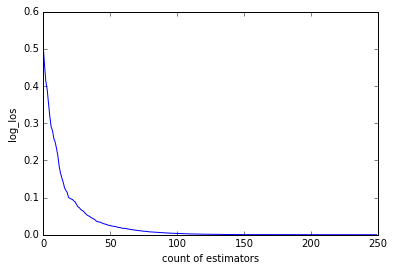



Test plot quality:


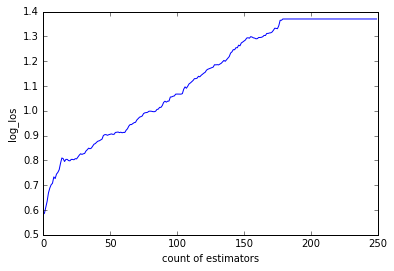



Learning rate:0.5
      Iter       Train Loss   Remaining Time 
         1           1.1255           30.13s
         2           1.0035           32.24s
         3           0.9386           31.70s
         4           0.8844           31.43s
         5           0.8381           31.36s
         6           0.7995           31.80s
         7           0.7559           31.84s
         8           0.7205           32.43s
         9           0.6958           32.99s
        10           0.6725           34.20s
        20           0.4672           30.33s
        30           0.3179           26.31s
        40           0.2274           24.17s
        50           0.1774           22.31s
        60           0.1394           21.44s
        70           0.1050           20.56s
        80           0.0805           19.17s
        90           0.0650           17.98s
       100           0.0511           17.22s
       200           0.0058            5.50s

Train plot quality:


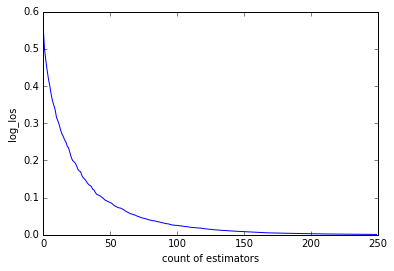



Test plot quality:


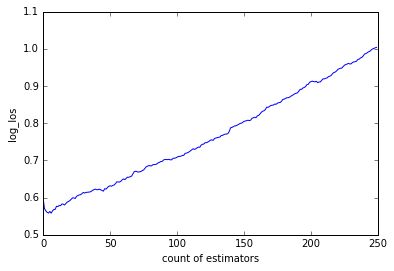



Learning rate:0.3
      Iter       Train Loss   Remaining Time 
         1           1.2095           25.15s
         2           1.1006           25.42s
         3           1.0240           25.20s
         4           0.9729           25.03s
         5           0.9387           24.40s
         6           0.8948           24.40s
         7           0.8621           24.13s
         8           0.8360           23.87s
         9           0.8171           23.57s
        10           0.7883           23.40s
        20           0.6164           21.82s
        30           0.4933           21.08s
        40           0.4248           19.95s
        50           0.3345           19.00s
        60           0.2760           18.43s
        70           0.2263           17.40s
        80           0.1971           16.30s
        90           0.1693           15.50s
       100           0.1388           14.51s
       200           0.0294            5.08s

Train plot quality:


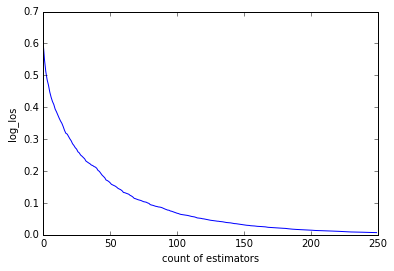



Test plot quality:


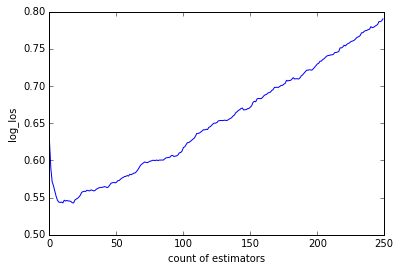



Learning rate:0.2
      Iter       Train Loss   Remaining Time 
         1           1.2613           35.35s
         2           1.1715           32.11s
         3           1.1009           31.78s
         4           1.0529           31.12s
         5           1.0130           29.84s
         6           0.9740           28.99s
         7           0.9475           27.98s
         8           0.9197           27.80s
         9           0.8979           27.44s
        10           0.8730           29.54s
        20           0.7207           30.76s
        30           0.6055           26.64s
        40           0.5244           24.32s
        50           0.4501           23.13s
        60           0.3908           21.66s
        70           0.3372           20.40s
        80           0.3009           19.60s
        90           0.2603           18.40s
       100           0.2327           17.71s
       200           0.0835            5.40s

Train plot quality:


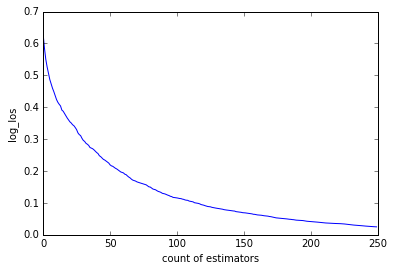



Test plot quality:


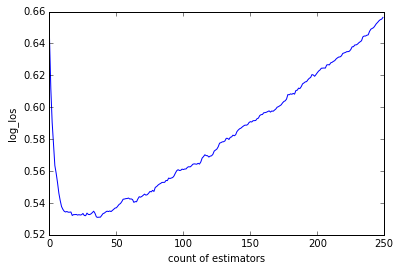



Learning rate:0.1
      Iter       Train Loss   Remaining Time 
         1           1.3199           28.88s
         2           1.2645           29.14s
         3           1.2170           29.80s
         4           1.1775           29.39s
         5           1.1404           28.52s
         6           1.1106           27.81s
         7           1.0844           27.32s
         8           1.0617           26.92s
         9           1.0411           26.59s
        10           1.0223           26.30s
        20           0.8864           23.96s
        30           0.7844           23.19s
        40           0.7176           21.64s
        50           0.6590           20.23s
        60           0.6120           18.95s
        70           0.5599           17.81s
        80           0.5242           16.70s
        90           0.4829           15.73s
       100           0.4473           14.83s
       200           0.2379            5.34s

Train plot quality:


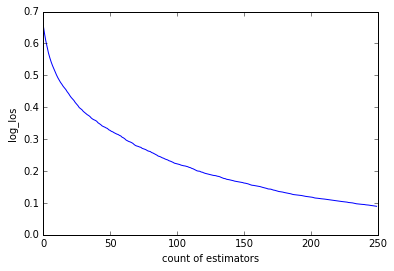



Test plot quality:


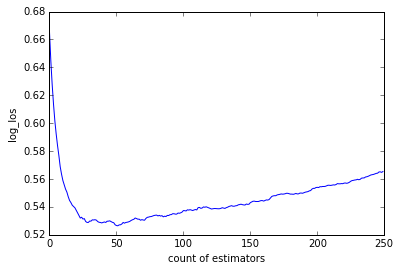




Min log_los with learning_train = 0.2 (key - number of iteration, value - min log_los): 	{36: 0.53091815680290511}

Quality:	0.54138128618


In [25]:
import math
import pandas
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# get data
data = pandas.read_csv('gbm-data.csv')

# separate features by train and test
X = data.values[0:,1:]
y = data.values[0:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

# sigmoid function
def sigmoid(y_pred):
    return (1/(1+math.exp(-y_pred)))
        
# start train with GradientBoostingClassifier
learning_rate_list = [1, 0.5, 0.3, 0.2, 0.1]
%matplotlib inline
min_log_los_test, list_log_log_test = 99999, {}
for l_r in learning_rate_list:
    grd = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate = l_r)
    print('Learning rate:' + str(l_r))
    grd.fit(X_train, y_train)
    
   
    # calculate log los for train data
    log_los_train = []
    for i, y_pred_train in enumerate(grd.staged_decision_function(X_train)):
        y_pred_train_mod = [sigmoid(i) for i in y_pred_train[0:,0]]
        log_los_res = log_loss(y_train, y_pred_train_mod)
        log_los_train.append(log_los_res)
    
    print()
    print('Train plot quality:')
    plt.figure()
    plt.plot(np.array(log_los_train))
    plt.ylabel('log_los')
    plt.xlabel('count of estimators')
    plt.show()
    print()
        
    # calculate log los for test data
    log_los_test = []
    for i, y_pred_test in enumerate(grd.staged_decision_function(X_test)):
        y_pred_test_mod = [sigmoid(i) for i in y_pred_test[0:,0]]
        log_los_res = log_loss(y_test, y_pred_test_mod)
        log_los_test.append(log_los_res)
        #search min log_los, if learning_rate = 0.2
        if l_r == 0.2:
            if log_los_res < min_log_los_test:
                list_log_log_test = {}
                min_log_los_test = log_los_res
                list_log_log_test[i] = min_log_los_test
                
    
    print()
    print('Test plot quality:')
    plt.figure()
    plt.plot(np.array(log_los_test))
    plt.ylabel('log_los')
    plt.xlabel('count of estimators')
    plt.show()
    print()
    
    print()
    
# We can see, that if learning rate=1, plot looks like overfitting, becouse error doesn't grow
# min log_los with learning_train = 0.2
print()
print('Min log_los with learning_train = 0.2 (key - number of iteration, value - min log_los): ', end = '\t')
print(list_log_log_test)

# Now we start train with RandomForestClassifier
estimator = RandomForestClassifier(random_state=241, n_estimators=36)
estimator.fit(X_train, y_train)
clf_probs = estimator.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print()
print('Quality:', end = '\t')
print(score)